# Matrix Representation of the Rubik's Cube

The goal of the notebook is to mathematically represent a Rubik's Cube configuration using matrices. Our goal is to seek a linear representation of the Rubik's Cube Group $G$ and thus invoke tools from representation theory to understand $G.$

In [1]:
from sympy import *
import numpy as np
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from IPython.display import Image
PATH = os.getcwd()
init_printing(use_unicode=True)

We give an image of the Rubik's Cube in its standard configuration. 


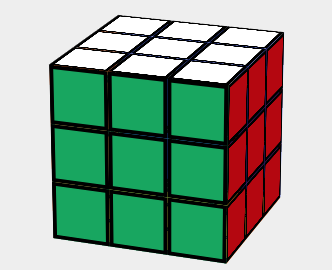

In [2]:
Image(filename = PATH + "/Cube.png", width=300, height=300)

We begin by labeling the $6$ sides of the cube as $F,L,U,B,R,D,$ which stand for the front side, left side, top side, back side, right side, and bottom side. We identify each side $A$ with the matrix 
$\begin{bmatrix} A_{i,j} \end{bmatrix}_{i,j=0}^{2}$ where each entry $A_{i,j} \in \lbrace \text{g,p,w,b,r,y} \rbrace.$ corresponds to the color of the $(i,j)$-th square. 

In [3]:
def face_names():
    return ['F','L','U','B','R','D']
def colors():
    return ['g','o','w','b','r','d']

We define a $\textbf{configuration}$ to be the ordered tuple of the matrices $F,L,U,B,R,D.$ We assume the $\textbf{identity configuration}$ is the one in the picture above i.e. each face consists of one and only one color. In particular, the $F$ has green, $L$ has pink, $U$ has white, $B$ has blue, $R$ has red, $D$ has yellow. In this Jupyter notebook, we write a configuration in the form of a $\textbf{dictionary}.$ The keys are the side names, and the values are their corresponding matrices. The first method simply adds $(i,j)$ subscripts to the entries of $F,L,U,B,R,D$ to facilitate things when it comes to defining movements later on. Hence, DO NOT CHANGE THE FIRST METHOD.  

In [4]:
def convert_config(config):
    matrices=list(config.values())
    for matrix in matrices:
        for i in range(3):
            for j in range(3):
                matrix[i,j]=Indexed(str(matrix[i,j])[:1],i,j)
    modified_matrices=[Matrix(matrix) for matrix in matrices]
    return dict(zip(face_names(),modified_matrices))

def identity_config():
    return dict(zip(face_names(),
                    [Matrix(col*ones(3,3)) for col in colors()]))


We have provided a function below to display the colorings of the sides for a configuration (as one would see it in real life) or, you may toggle it to view the matrices without coloring by setting use_colors parameter to be false. We give an example of the viewing options in the identity configuration. The matrices are presented in the order of $F,L,U,B,R,D.$ 

In [5]:
def display(config,use_colors=True):
    matrices=[Matrix([str(i)[:1] for i in M]).reshape(3,3) for M in list(config.values())]
    colors_dict=dict(zip(colors(),range(6)))
    if(use_colors):
        fig, ax = plt.subplots(1,6,figsize=(10,10))
        for i in range(len(ax)):
            plateau=np.array([colors_dict[str(j)] for j in list(matrices[i])]).reshape(3,3)
            c = mpl.colors.ListedColormap(['green', 'orange','white','blue','red','yellow'])
            n = mpl.colors.Normalize(vmin=0,vmax=6)
            ax[i].matshow(plateau,cmap=c,norm=n)
            ax[i].grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
            ax[i].set_xticks(np.arange(-.5, 2.5, 1));
            ax[i].set_yticks(np.arange(-.5, 2.5, 1));
            ax[i].set_yticklabels([])
            ax[i].set_xticklabels([])
            ax[i].set_title(face_names()[i])
        return fig
    else:
        return matrices

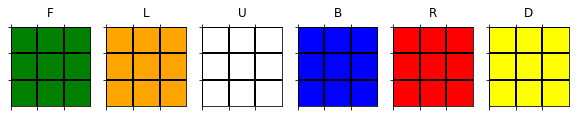

In [6]:
display(identity_config())

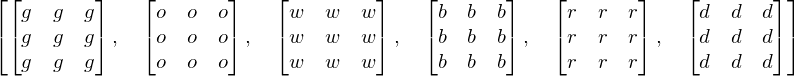

In [7]:
display(identity_config(),use_colors=False)

# Simulating Moves


The next part is to simulate the various moves (turns) one could make on the Rubik's Cube. We define $\textbf{A}$ to be the move to rotate side $A$ clockwise by $90$ degrees. We define $\textbf{A'}$ to be the move to rotate side $A$ counter-clockwise by $90$ degrees i.e. the inverse of the move $\textbf{A}.$ DO NOT CHANGE THE FIRST METHOD. The first method was used to hard code the faces whose matrices would have certain values change upon doing a move. The second method allows us to pass in a move name as a string and configuration and will return the resulting configuration upon doing such a move. We have also defined the third movement to facilitate sequences of more than one move. In particular, the third movement accepts a list of move names and returns the configuration upon doing the sequence of moves in the order presented by the list.

In [8]:
def moving_sequence_dict(move_name,config):
    config=convert_config(config)
    M=Matrix([[0,0,1],[0,1,0],[1,0,0]])
    changing_face_dict={
    'U': tuple([config['F'].row(0), config['L'].row(0), config['B'].row(0), config['R'].row(0)]),
    'D': tuple([config['F'].row(-1),config['R'].row(-1), config['B'].row(-1), config['L'].row(-1)]),
    'F': tuple([config['U'].row(-1), config['R'].col(0), config['D'].row(0)*M, M*config['L'].col(-1)]),
    'B': tuple([config['U'].row(0), config['R'].col(-1), config['D'].row(-1)*M, M*config['L'].col(0)]),
    'L': tuple([config['F'].col(0), config['D'].col(0), M*config['B'].col(-1), config['U'].col(0)]),
    'R': tuple([config['F'].col(-1), config['U'].col(-1), M*config['B'].col(0), config['D'].col(-1)])
    }
    faces=changing_face_dict[move_name]
    seq_dict={}
    for i in range(len(faces)):
        for j in range(len(faces[i])):
            seq_dict.update({faces[i][j]:faces[i-1][j]})
    return seq_dict

In [9]:
def rotate(move_name=None,config=identity_config()):
    config=convert_config(config)
    if move_name is None:
        return config
    
    if "'" in move_name:
        move_name=move_name.replace("'","")
        return rotate_sequence([move_name,move_name,move_name],config)
    
    M=Matrix([[0,0,1],[0,1,0],[1,0,0]])
    seq_dict=moving_sequence_dict(move_name,config)
    faces=face_names()
    config=convert_config(config)
    rotate_dict=dict(zip(faces,[Matrix(Transpose(config[face])*M) for face in faces]))
    config_copy=copy.deepcopy(config)
    config_copy=dict(zip(list(config_copy.keys()),[Matrix(config_copy[i]) for i in list(config_copy.keys())]))
    for k in range(len(faces)):
        for i in range(3):
            for j in range(3):
                if(config[faces[k]][i,j] in list(seq_dict.keys())):
                    config_copy[faces[k]] [i,j]=seq_dict[config[faces[k]] [i,j]]
    config_copy[move_name]=rotate_dict[move_name]
    return config_copy

def rotate_sequence(move_names,config=identity_config()):
    final_config=config
    for name in move_names:
        final_config=rotate(name,config=final_config)
    return final_config

One may check this results of the code by doing these following operations on a real-life Rubiks Cube.

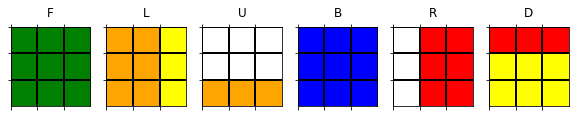

In [10]:
display(rotate_sequence(["F"]))

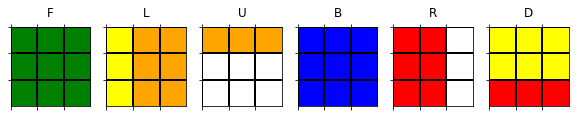

In [11]:
display(rotate_sequence(["B"]))

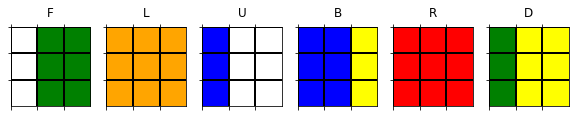

In [12]:
display(rotate_sequence(["L"]))

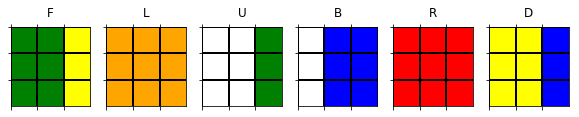

In [13]:
display(rotate_sequence(["R"]))

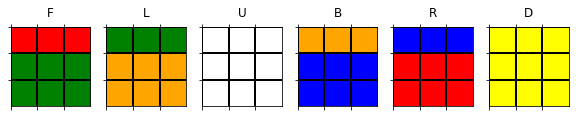

In [14]:
display(rotate_sequence(["U"]))

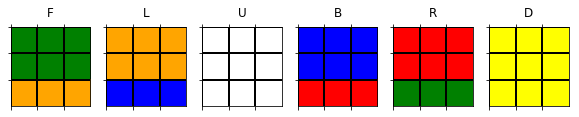

In [15]:
display(rotate_sequence(["D"]))

In [16]:
plt.close('all')